# SQL Project
You were hired by Ironhack to perform an Analytics Consulting Project entitled: competitive landscape.

Your mission is to create and populate an appropriate database with many coding schools that are our competition, as well as design an suitable queries that answer business questions of interest (to be defined by you)


**Suggested Steps in the Project:**


*   Read this notebook and understand each function. Comment the code appropriately

*   Populate the list of schools with a wider variety of schools (how are you going to get the school ID?)

* Take a look at the obtained dataframes. What dimensions do you have? what keys do you have? how could the different dataframes be connected?

* Go back to the drawing board and try to create an entity relationship diagram for tables available

* Once you have the schemas you want, you will need to:
  - create the suitable SQL queries to create the tables and populate them
  - run these queries using the appropriate Python connectors
  
* Bonus: How will this datamodel be updated in the future? Please write auxiliary functions that test the database for data quality issues. For example: how could you make sure you only include the most recent comments when you re-run the script?


# Suggested Deliverables

* 5-6 minute presentation of data model created, decision process and business analysis proposed

* exported .sql file with the final schema

* Supporting python files used to generate all logic

* High level documentation explaining tables designed and focusing on update methods

Crucial hint: check out the following tutorial:
https://www.dataquest.io/blog/sql-insert-tutorial/


1. DATA SCRAPPING

In [106]:
# STEP 1 : Select schools to perform competitive analysis 

# you must populate this dict with the schools required -> try talking to the teaching team about this


schools = {   
'ironhack' : 10828,
'app-academy' : 10525,
'springboard' : 11035    
} # Add more schools here to perform competitive analysis


In [107]:
# STEP 2 : Import relevant packages 

import re
import pandas as pd
from pandas.io.json import json_normalize
import requests

#probably we'll need those packages later on for Data analysis 

# For potential EDA
#import seaborn as sns
import matplotlib.pyplot as plt

# For creating database
#import mysql.connector
#import getpass

In [108]:
# STEP 3 : Function to select school comments

def get_comments_school(school):
    TAG_RE = re.compile(r'<[^>]+>')
    
    # defines url to make api call to data -> dynamic with school if you want to scrape competition
    url = "https://www.switchup.org/chimera/v1/school-review-list?mainTemplate=school-review-list&path=%2Fbootcamps%2F" + school + "&isDataTarget=false&page=3&perPage=10000&simpleHtml=true&truncationLength=250"
    
    #makes get request and converts answer to json
    # url defines the page of all the information, request is made, and information is returned to data variable
    data = requests.get(url).json()
    
    #converts json to dataframe
    reviews =  pd.DataFrame(data['content']['reviews'])
  
    #aux function to apply regex and remove tags
    def remove_tags(x):
        return TAG_RE.sub('',x)
    reviews['review_body'] = reviews['body'].apply(remove_tags)
    reviews['school'] = school
    return reviews

In [131]:
#Set up comment dataframe

# could you write this as a list comprehension? ;)
comments = []

for school in schools.keys():
    print(school)
    comments.append(get_comments_school(school))

comments = pd.concat(comments)

#List comprehension version 

#comments = [get_comments_school(school) for school in schools.keys()]
#comments = pd.concat(comments)

ironhack
app-academy
springboard


In [132]:
pd.options.display.max_columns = None #to show all the columns

comments.head()

,id,name,anonymous,hostProgramName,graduatingYear,isAlumni,jobTitle,tagline,body,rawBody,createdAt,queryDate,program,user,overallScore,comments,overall,curriculum,jobSupport,review_body,school
0,306215,Anonymous,True,None,2023.0,True,,Transformative Experience: My Time at Ironhack,"<span class=""truncatable""><p></p><p>Pros: 1)In...",<p>Pros: 1)Intensive Learning 2)Real-World Pro...,11/6/2023,2023-11-06,Web Development Bootcamp,{'image': None},4.0,[],4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
1,306068,Anonymous,True,None,2023.0,False,Full stack development,Now I can do it,"<span class=""truncatable""><p></p><p>7 months a...","<p>7 months ago, I only had an idea about html...",10/31/2023,2023-10-31,None,{'image': None},5.0,[],5.0,5.0,5.0,"7 months ago, I only had an idea about html an...",ironhack
2,305297,Utku Cikmaz,False,None,2023.0,False,Full Stack Web Developer,It was good,"<span class=""truncatable""><p></p><p>The course...","<p>The course was great. Especially, Luis is a...",10/2/2023,2023-10-02,Web Development Bootcamp,{'image': None},4.0,[],5.0,3.0,4.0,"The course was great. Especially, Luis is a gr...",ironhack
3,305278,Nirmal Hodge,False,None,2023.0,False,Product Designer,Ironhack 100% Worth It!,"<span class=""truncatable""><p></p><p>I joined t...",<p>I joined the UX/ UI Bootcamp and to be hone...,9/30/2023,2023-09-30,UX/UI Design Bootcamp,{'image': None},5.0,[],5.0,5.0,5.0,I joined the UX/ UI Bootcamp and to be honest ...,ironhack
4,305231,Anonymous,True,None,2023.0,False,,Still waiting a refund,"<span class=""truncatable""><p></p><p>Unfortunat...",<p>Unfortunately wouldn&rsquo;t recommend it. ...,9/28/2023,2023-09-28,Web Development Bootcamp,{'image': None},1.0,[],1.0,1.0,1.0,Unfortunately wouldn’t recommend it. Still wai...,ironhack


In [135]:
#Get selected school information

from pandas.io.json import json_normalize

def get_school_info(school, school_id):
    
    # Define url to make api calls
    url = 'https://www.switchup.org/chimera/v1/bootcamp-data?mainTemplate=bootcamp-data%2Fdescription&path=%2Fbootcamps%2F'+ str(school) + '&isDataTarget=false&bootcampId='+ str(school_id) + '&logoTag=logo&truncationLength=250&readMoreOmission=...&readMoreText=Read%20More&readLessText=Read%20Less'

     # Make get-request and convert answer to json
    data = requests.get(url).json()

    data.keys()

    # Set up 'courses' data frame
    courses = data['content']['courses']
    courses_df = pd.DataFrame(courses, columns= ['courses'])

    # Set up 'locations' data frame
    locations = data['content']['locations']
    locations_df = json_normalize(locations)
    

    # Set up 'badges' data frame
    badges_df = pd.DataFrame(data['content']['meritBadges'])
    
    # Set up 'schools' data frame
    website = data['content']['webaddr']
    description = data['content']['description']
    logoUrl = data['content']['logoUrl']
    school_df = pd.DataFrame([website,description,logoUrl]).T
    school_df.columns =  ['website','description','LogoUrl']

    # Set schools
    locations_df['school'] = school
    courses_df['school'] = school
    badges_df['school'] = school
    school_df['school'] = school
    
    # Set school ids
    locations_df['school_id'] = school_id
    courses_df['school_id'] = school_id
    badges_df['school_id'] = school_id
    school_df['school_id'] = school_id
    
    
    #Return all Data Frames
    return locations_df, courses_df, badges_df, school_df

# Create container lists
locations_list = []
courses_list = []
badges_list = []
schools_list = []

# Populate container lists
for school, id in schools.items():
    print(school)
    a,b,c,d = get_school_info(school,id)
    
    locations_list.append(a)
    courses_list.append(b)
    badges_list.append(c)
    schools_list.append(d)



ironhack


/var/folders/k_/zzt_gt2j0mgf2704mzjrzkcr0000gn/T/ipykernel_7033/1033168766.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


app-academy


/var/folders/k_/zzt_gt2j0mgf2704mzjrzkcr0000gn/T/ipykernel_7033/1033168766.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


springboard


/var/folders/k_/zzt_gt2j0mgf2704mzjrzkcr0000gn/T/ipykernel_7033/1033168766.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


In [ ]:
locations_list

2. CREATE DATA FRAMES

In [206]:
# Create locations data frame
locations = pd.concat(locations_list)
locations.sample()

,id,description,country.id,country.name,country.abbrev,city.id,city.name,city.keyword,state.id,state.name,state.abbrev,state.keyword,school,school_id
3,16088,"Sao Paulo, Brazil",42.0,Brazil,BR,31121.0,Sao Paulo,sao-paulo,NaN,NaN,NaN,NaN,ironhack,10828


In [137]:
# Create courses data frame
courses = pd.concat(courses_list)
courses.head(10)

,courses,school,school_id
0,Cyber Security Bootcamp,ironhack,10828
1,Cybersecurity Part-Time,ironhack,10828
2,Data Analytics Bootcamp,ironhack,10828
3,Data Analytics Part-Time,ironhack,10828
4,UX/UI Design Bootcamp,ironhack,10828
5,UX/UI Design Part-Time,ironhack,10828
6,Web Development Bootcamp,ironhack,10828
7,Web Development Part-Time,ironhack,10828
0,16-week Software Engineering Program,app-academy,10525
1,Bootcamp Prep,app-academy,10525


In [138]:
# Create badges DataFrame
badges = pd.concat(badges_list)
badges.head()

,name,keyword,description,school,school_id
0,Available Online,available_online,<p>School offers fully online courses</p>,ironhack,10828
1,Verified Outcomes,verified_outcomes,<p>School publishes a third-party verified out...,ironhack,10828
2,Flexible Classes,flexible_classes,<p>School offers part-time and evening classes...,ironhack,10828
0,Available Online,available_online,<p>School offers fully online courses</p>,app-academy,10525
1,Flexible Classes,flexible_classes,<p>School offers part-time and evening classes...,app-academy,10525


In [139]:
# Create schools data frame

# any data cleaning still missing here? take a look at the description
schools = pd.concat(schools_list)
schools.head()

,website,description,LogoUrl,school,school_id
0,www.ironhack.com/en,"<span class=""truncatable""><p>Ironhack is a glo...",https://d92mrp7hetgfk.cloudfront.net/images/si...,ironhack,10828
0,appacademy.io,"<span class=""truncatable""><p>Founded in 2012, ...",https://d92mrp7hetgfk.cloudfront.net/images/si...,app-academy,10525
0,www.springboard.com/?utm_source=switchup&utm_m...,"<span class=""truncatable""><p>Springboard is an...",https://d92mrp7hetgfk.cloudfront.net/images/si...,springboard,11035


2. DATA CLEANING

In [140]:
# Check if data cleaning is needed 

#Description column contains

schools['description'] #contains HTML strings

#Probably we need to perform some data cleaning to extract the text content from the HTML tags. 
#This process known as HTML tag removal.

0    <span class="truncatable"><p>Ironhack is a glo...
0    <span class="truncatable"><p>Founded in 2012, ...
0    <span class="truncatable"><p>Springboard is an...
Name: description, dtype: object

In [141]:
#Use function defined in the 1st cell to clean up and remove HTML tags

def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)

# Apply the remove_tags function to the 'description' column in the 'schools' DataFrame
schools['description'] = schools['description'].apply(remove_tags)

schools['description']

#Note : Other method, using chaining
#schools['description'] = schools['description'].str.replace(r'<[^>]*>', '', regex=True)

0    Ironhack is a global tech school with 9 campus...
0    Founded in 2012, App Academy is a world-renown...
0    Springboard is an online learning platform tha...
Name: description, dtype: object

In [142]:
#clean_description created firstly to avoid to overwrite the original description
#but we can directly overwrite in the 'description' column
schools.head()

,website,description,LogoUrl,school,school_id
0,www.ironhack.com/en,Ironhack is a global tech school with 9 campus...,https://d92mrp7hetgfk.cloudfront.net/images/si...,ironhack,10828
0,appacademy.io,"Founded in 2012, App Academy is a world-renown...",https://d92mrp7hetgfk.cloudfront.net/images/si...,app-academy,10525
0,www.springboard.com/?utm_source=switchup&utm_m...,Springboard is an online learning platform tha...,https://d92mrp7hetgfk.cloudfront.net/images/si...,springboard,11035


2.a FURTHER DATA CLEANING ON THE DATAFRAMES

2.a.1 - Cleaning on 1st Dataframe : Comments

In [148]:
# FIRST THINGS FIRST - Check the dataframe

# Let's start with the Comments dataframe

# Important to determine how we treat and perform operations on each column

# Check datatypes 

comments.dtypes

#comments.shape

id                   int64
name                object
anonymous             bool
hostProgramName     object
graduatingYear     float64
isAlumni              bool
jobTitle            object
tagline             object
body                object
rawBody             object
createdAt           object
queryDate           object
program             object
user                object
overallScore        object
comments            object
overall             object
curriculum          object
jobSupport          object
review_body         object
school              object
dtype: object

In [144]:
# Check if there is NaN values in each column for the Comments DataFrame

nan_counts = comments.isna().sum()

# Display the NaN counts for each column
print(nan_counts)

id                    0
name                  0
anonymous             0
hostProgramName    2186
graduatingYear        4
isAlumni              0
jobTitle           1425
tagline               1
body                  0
rawBody               0
createdAt             0
queryDate             0
program             239
user                  0
overallScore          8
comments              0
overall              10
curriculum           47
jobSupport          288
review_body           0
school                0
dtype: int64


In [146]:
#Hypothesis is that host programm name is giving more general category than Program
#host_program_name = comments['hostProgramName'].unique()

#print(host_program_name)

In [145]:
# Filter rows where 'hostProgramName' is equal to 'Data Analytics'
#data_analytics_rows = comments[comments['hostProgramName'] == 'Data Analytics']

# Display the resulting DataFrame
#data_analytics_rows.head()

In [157]:
# Replace NaN with 'No info' in the 'hostProgramName' column
comments['hostProgramName'].fillna('No info', inplace=True)

print(comments['hostProgramName'].unique())

['No info' 'Software Engineering' 'Data Analytics' 'UX/UI Design'
 'Web Development' 'Bootcamp Prep' 'Data Science' 'Digital Marketing'
 'Cybersecurity']


In [151]:
# Replace NaN with 'No info' in the Job titles column
comments['jobTitle'].fillna('No info', inplace=True)

In [152]:
#Job Titles is a bit messy, let's create a function to clean up and harmonize job titles
#and replace the NaN values with 'No info'

import re

# Your cleaning function for job titles
def clean_job_title(title):
    # Replace 'none' or 'looking for a job' with 'No info'
    title = re.sub(r'(?i)\b(?:none|looking for a job)\b', 'No info', title)
    
    # Additional cleaning logic for job titles harmonization
    title = re.sub(r'(?i)\b(?:fullstack|full stack|full-stack)\b', 'Full Stack', title)
    title = re.sub(r'(?i)\b(?:ux/ui|ux/ui design|ux/ui designer)\b', 'UX/UI Designer', title)
    title = re.sub(r'(?i)\b(?:software developer|software eng|developer|dev)\b', 'Software Developer', title)
    title = re.sub(r'(?i)\b(?:data analyst|data analytics)\b', 'Data Analyst', title)
    title = re.sub(r'(?i)\b(?:cybersecurity|cyber security|info sec)\b', 'Cybersecurity Analyst', title)
    
    # Remove non-alphanumeric characters
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    
    # Remove extra whitespaces
    title = re.sub(r'\s+', ' ', title).strip()
    
    # Replace empty spaces with 'No info'
    title = 'No info' if title == '' else title
    
    # Convert to uppercase
    title = title.upper()
    
    return title

# Assuming 'Comments' is your DataFrame and 'job_title' is the column to clean
# Replace 'Comments' and 'job_title' with your actual DataFrame and column names

# Apply the cleaning function to the 'job_title' column in the 'Comments' DataFrame
comments['jobTitle'] = comments['jobTitle'].apply(clean_job_title)

# Display the cleaned DataFrame
comments.head()


,id,name,anonymous,hostProgramName,graduatingYear,isAlumni,jobTitle,tagline,body,rawBody,createdAt,queryDate,program,user,overallScore,comments,overall,curriculum,jobSupport,review_body,school
0,306215,Anonymous,True,None,2023.0,True,NO INFO,Transformative Experience: My Time at Ironhack,"<span class=""truncatable""><p></p><p>Pros: 1)In...",<p>Pros: 1)Intensive Learning 2)Real-World Pro...,11/6/2023,2023-11-06,Web Development Bootcamp,{'image': None},4.0,[],4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
1,306068,Anonymous,True,None,2023.0,False,FULL STACK DEVELOPMENT,Now I can do it,"<span class=""truncatable""><p></p><p>7 months a...","<p>7 months ago, I only had an idea about html...",10/31/2023,2023-10-31,None,{'image': None},5.0,[],5.0,5.0,5.0,"7 months ago, I only had an idea about html an...",ironhack
2,305297,Utku Cikmaz,False,None,2023.0,False,FULL STACK WEB SOFTWARE DEVELOPER,It was good,"<span class=""truncatable""><p></p><p>The course...","<p>The course was great. Especially, Luis is a...",10/2/2023,2023-10-02,Web Development Bootcamp,{'image': None},4.0,[],5.0,3.0,4.0,"The course was great. Especially, Luis is a gr...",ironhack
3,305278,Nirmal Hodge,False,None,2023.0,False,PRODUCT DESIGNER,Ironhack 100% Worth It!,"<span class=""truncatable""><p></p><p>I joined t...",<p>I joined the UX/ UI Bootcamp and to be hone...,9/30/2023,2023-09-30,UX/UI Design Bootcamp,{'image': None},5.0,[],5.0,5.0,5.0,I joined the UX/ UI Bootcamp and to be honest ...,ironhack
4,305231,Anonymous,True,None,2023.0,False,NO INFO,Still waiting a refund,"<span class=""truncatable""><p></p><p>Unfortunat...",<p>Unfortunately wouldn&rsquo;t recommend it. ...,9/28/2023,2023-09-28,Web Development Bootcamp,{'image': None},1.0,[],1.0,1.0,1.0,Unfortunately wouldn’t recommend it. Still wai...,ironhack


In [153]:
# Replace NaN with 'No info' in the 'Program' column
comments['program'].fillna('No info', inplace=True)

In [154]:
#Lots of different bootcamp. To simplify the analysis, maybe we can try to have more
#general names per category 

# Define a function to map program names to categories
#def map_program_category(program):
#    if 'Data Analytics' in str(program):
#        return 'Data Analytics Bootcamp'
#    elif 'UX/UI Design' in str(program):
#        return 'UX/UI Design Bootcamp'
#    elif 'Web Development' in str(program):
#        return 'Web Development Bootcamp'
#    elif 'Cybersecurity' in str(program):
#        return 'Cybersecurity Bootcamp'
#    else:
#        return 'Other'
#
## Create a new column 'program_category' based on the mapping function,
##so we don't overwrite the program values
#comments['program_category'] = comments['program'].apply(map_program_category)
#
#comments.head()

In [155]:
#Columns with numerical values that have NaN
#Datatypes = object

#overallScore           8
#overall               10
#curriculum            47
#jobSupport           288

#Convert those objects as numerical values
comments['overall'] = pd.to_numeric(comments['overall'], errors='coerce')
comments['curriculum'] = pd.to_numeric(comments['curriculum'], errors='coerce')
comments['jobSupport'] = pd.to_numeric(comments['jobSupport'], errors='coerce')
comments['overallScore'] = pd.to_numeric(comments['overallScore'], errors='coerce')
# Now you can replace NaN with the mean value for each column
#Not perfect but this is the best of the worst guess we can make for those NaN
comments['overall'].fillna(comments['overall'].mean(), inplace=True)
comments['curriculum'].fillna(comments['curriculum'].mean(), inplace=True)
comments['jobSupport'].fillna(comments['jobSupport'].mean(), inplace=True)
comments['overallScore'].fillna(comments['overallScore'].mean(), inplace=True)

#Applying pd.to_numeric with errors='coerce' will attempt to convert the values 
#in the columns to numeric types, and any values that cannot be converted 
#(due to non-numeric characters or other issues) will be replaced with NaN. 
#This is useful when you want to clean up your data and ensure 
#that only valid numeric values remain.


In [159]:
# let's check if we removed all NaN

nan_counts = comments.isna().sum()

print(nan_counts)

id                 0
name               0
anonymous          0
hostProgramName    0
graduatingYear     4
isAlumni           0
jobTitle           0
tagline            1
body               0
rawBody            0
createdAt          0
queryDate          0
program            0
user               0
overallScore       0
comments           0
overall            0
curriculum         0
jobSupport         0
review_body        0
school             0
dtype: int64


In [160]:
# Go more qualitative
# Check rows where 'graduatingYear' or 'tagline' has NaN values
nan_rows = comments[comments['graduatingYear'].isna() | comments['tagline'].isna()]

nan_rows

,id,name,anonymous,hostProgramName,graduatingYear,isAlumni,jobTitle,tagline,body,rawBody,createdAt,queryDate,program,user,overallScore,comments,overall,curriculum,jobSupport,review_body,school
1136,235100,Cindy Wangsta,False,No info,NaN,False,NO INFO,Cool place to come and learn,"<span class=""truncatable""><p>Pros:<br>- you me...",Pros:\r\n- you meet a ton of new people\r\n- e...,11/19/2016,2016-11-19,Software Engineer Track: In-Person,{'image': None},5.000000,[],5.000000,5.000000,5.000000,Pros:- you meet a ton of new people- everyone ...,app-academy
1164,234193,Anonymous,False,No info,NaN,False,ENGINEER,Like your dad always told you,"<span class=""truncatable""><p>You get out of it...",You get out of it what you put into it. \r\n\r...,7/15/2016,2016-07-15,Bootcamp Prep,{'image': None},3.700000,[],4.000000,4.000000,3.000000,You get out of it what you put into it. a/A wo...,app-academy
1187,243193,Anonymous,False,No info,NaN,False,SOFTWARE ENGINEER,"Decent engineering curriculum, rock-bottom ter...","<span class=""truncatable""><p>Pros: Paid out of...","Pros: Paid out of salary, hence only a small u...",7/13/2016,2016-07-13,Software Engineer Track: In-Person,{'image': None},2.700000,[],2.000000,5.000000,1.000000,"Pros: Paid out of salary, hence only a small u...",app-academy
1197,245141,Zen Zoe,False,No info,2013.0,True,NO INFO,None,"<span class=""truncatable""><p></p><p>This is a ...",<p>This is a personal story.&nbsp;\r\n\r\nI gr...,12/28/2013,2013-12-28,No info,{'image': None},4.642144,[],4.721381,4.620551,4.566284,This is a personal story. I graduated from the...,app-academy
1536,235467,Anonymous,False,No info,NaN,False,NO INFO,Intensive learing that works with your schedule.,"<span class=""truncatable""><p>I took this cours...",I took this course to help me make data driven...,3/23/2017,2017-03-23,No info,{'image': None},5.000000,[],5.000000,5.000000,5.000000,I took this course to help me make data driven...,springboard


In [161]:
# Replace NaN for 'graduatingYear' and 'tagline' columns
comments['graduatingYear'].fillna(0.0, inplace=True) #in case we need to convert this columns as int later on
comments['tagline'].fillna('No Comment', inplace=True)

#nan_counts = comments.isna().sum()
#print(nan_counts)

In [162]:
comments['graduatingYear'].replace('', 0.0, inplace=True)

# convert the graduating year columns as int and remove the .0 for better readibility

# Remove '.0' from numeric values
comments['graduatingYear'] = comments['graduatingYear'].astype('Int64').astype(str).str.rstrip('.0')
comments.head()


,id,name,anonymous,hostProgramName,graduatingYear,isAlumni,jobTitle,tagline,body,rawBody,createdAt,queryDate,program,user,overallScore,comments,overall,curriculum,jobSupport,review_body,school
0,306215,Anonymous,True,No info,2023,True,NO INFO,Transformative Experience: My Time at Ironhack,"<span class=""truncatable""><p></p><p>Pros: 1)In...",<p>Pros: 1)Intensive Learning 2)Real-World Pro...,11/6/2023,2023-11-06,Web Development Bootcamp,{'image': None},4.0,[],4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
1,306068,Anonymous,True,No info,2023,False,FULL STACK DEVELOPMENT,Now I can do it,"<span class=""truncatable""><p></p><p>7 months a...","<p>7 months ago, I only had an idea about html...",10/31/2023,2023-10-31,No info,{'image': None},5.0,[],5.0,5.0,5.0,"7 months ago, I only had an idea about html an...",ironhack
2,305297,Utku Cikmaz,False,No info,2023,False,FULL STACK WEB SOFTWARE DEVELOPER,It was good,"<span class=""truncatable""><p></p><p>The course...","<p>The course was great. Especially, Luis is a...",10/2/2023,2023-10-02,Web Development Bootcamp,{'image': None},4.0,[],5.0,3.0,4.0,"The course was great. Especially, Luis is a gr...",ironhack
3,305278,Nirmal Hodge,False,No info,2023,False,PRODUCT DESIGNER,Ironhack 100% Worth It!,"<span class=""truncatable""><p></p><p>I joined t...",<p>I joined the UX/ UI Bootcamp and to be hone...,9/30/2023,2023-09-30,UX/UI Design Bootcamp,{'image': None},5.0,[],5.0,5.0,5.0,I joined the UX/ UI Bootcamp and to be honest ...,ironhack
4,305231,Anonymous,True,No info,2023,False,NO INFO,Still waiting a refund,"<span class=""truncatable""><p></p><p>Unfortunat...",<p>Unfortunately wouldn&rsquo;t recommend it. ...,9/28/2023,2023-09-28,Web Development Bootcamp,{'image': None},1.0,[],1.0,1.0,1.0,Unfortunately wouldn’t recommend it. Still wai...,ironhack


In [163]:
#Clean columns 'Comments' or drop it ?

# Convert lists to strings in the 'comments' column
#comments['comments'] = comments['comments'].apply(lambda x: str(x))

# Get unique values
#unique_comments = comments['comments'].unique()

#print(unique_comments)

In [164]:
#Use function defined in the 1st cell to clean up and remove HTML tags in the Body column

def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)

# Apply the remove_tags function to the 'description' column in the 'schools' DataFrame
comments['body'] = comments['body'].apply(remove_tags)

comments.head(2)

,id,name,anonymous,hostProgramName,graduatingYear,isAlumni,jobTitle,tagline,body,rawBody,createdAt,queryDate,program,user,overallScore,comments,overall,curriculum,jobSupport,review_body,school
0,306215,Anonymous,True,No info,2023,True,NO INFO,Transformative Experience: My Time at Ironhack,Pros: 1)Intensive Learning 2)Real-World Projec...,<p>Pros: 1)Intensive Learning 2)Real-World Pro...,11/6/2023,2023-11-06,Web Development Bootcamp,{'image': None},4.0,[],4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
1,306068,Anonymous,True,No info,2023,False,FULL STACK DEVELOPMENT,Now I can do it,"7 months ago, I only had an idea about html an...","<p>7 months ago, I only had an idea about html...",10/31/2023,2023-10-31,No info,{'image': None},5.0,[],5.0,5.0,5.0,"7 months ago, I only had an idea about html an...",ironhack


In [176]:
#Which columns to drop in the comments database ? 

#name               # Not useful for analysis
#anonymous          # If all values are True or False, it may not provide much insight
#hostProgramName    # If it's the same for all records, it might not be informative
#isAlumni           # If all values are True or False, it may not provide much insight
#body               # If 'rawBody' contains the detailed information, 'body' might be redundant
#createdAt          # Date of the comment creation, might not be crucial for analysis
#queryDate          # Similar to 'createdAt', might not be crucial for analysis
#user               # If 'anonymous' is already capturing anonymity, 'user' might not be needed
#comments           # If 'comments' is empty for all records, it might not be informative
#review_body        # If 'rawBody' contains the detailed information, 'review_body' might be redundant
#school             # If 'program' is already capturing the school information, 'school' might not be needed

# Create a copy of the original DataFrame
comments_cleaned = comments.copy()

# Drop unnecessary columns
columns_to_drop = ['name', 'anonymous', 'isAlumni', 'body', 'createdAt', 'queryDate', 'user', 'comments', 'rawBody']
comments_cleaned = comments_cleaned.drop(columns=columns_to_drop)

In [190]:
#Finally harmonize the titles
# Define a mapping of old column names to new column names
#column_mapping = {
#    'id': 'id',
#    'hostProgramName': 'host_program_name',
#    'graduatingYear': 'graduating_year',
#    'jobTitle': 'job_position',
#    'tagline': 'tagline',
#    'program': 'program',
#    'overallScore': 'overall_score',
#    'overall': 'overall',
#    'curriculum': 'curriculum',
#    'jobSupport': 'job_support',
#    'review_body': 'review_body',
#    'school': 'school'
#}
#
## Rename the columns in the DataFrame
#comments_cleaned.rename(columns=column_mapping, inplace=True)

# Define the new column names
new_columns = ['id', 'host_program_name', 'graduating_year', 'job_position', 'tagline', 'program', 'overall_score', 'overall', 'curriculum', 'job_support', 'review_body', 'school']

# Assign the new column names to the DataFrame
comments_cleaned.columns = new_columns


In [191]:
#Use this Dataframe for SQL Database import
comments_cleaned.head()

,id,host_program_name,graduating_year,job_position,tagline,program,overall_score,overall,curriculum,job_support,review_body,school
0,306215,No info,2023,NO INFO,Transformative Experience: My Time at Ironhack,Web Development Bootcamp,4.0,4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
1,306068,No info,2023,FULL STACK DEVELOPMENT,Now I can do it,No info,5.0,5.0,5.0,5.0,"7 months ago, I only had an idea about html an...",ironhack
2,305297,No info,2023,FULL STACK WEB SOFTWARE DEVELOPER,It was good,Web Development Bootcamp,4.0,5.0,3.0,4.0,"The course was great. Especially, Luis is a gr...",ironhack
3,305278,No info,2023,PRODUCT DESIGNER,Ironhack 100% Worth It!,UX/UI Design Bootcamp,5.0,5.0,5.0,5.0,I joined the UX/ UI Bootcamp and to be honest ...,ironhack
4,305231,No info,2023,NO INFO,Still waiting a refund,Web Development Bootcamp,1.0,1.0,1.0,1.0,Unfortunately wouldn’t recommend it. Still wai...,ironhack


2.a.2 - Cleaning on 2nd Dataframe : Locations

In [207]:
locations.shape

(14, 14)

In [208]:
locations.dtypes

id                  int64
description        object
country.id        float64
country.name       object
country.abbrev     object
city.id           float64
city.name          object
city.keyword       object
state.id          float64
state.name         object
state.abbrev       object
state.keyword      object
school             object
school_id           int64
dtype: object

In [209]:
nan_counts = locations.isna().sum()

print(nan_counts)

id                0
description       0
country.id        3
country.name      3
country.abbrev    3
city.id           3
city.name         3
city.keyword      3
state.id          8
state.name        8
state.abbrev      8
state.keyword     8
school            0
school_id         0
dtype: int64


In [211]:
# Define a mapping for column name changes
column_name_mapping = {
    'country.id': 'country_id',
    'country.name': 'country_name',
    'country.abbrev': 'country_abbrev',
    'city.id': 'city_id',
    'city.name': 'city_name',
    'city.keyword': 'city_keyword',
    'state.id': 'state_id',
    'state.name': 'state_name',
    'state.abbrev': 'state_abbrev',
    'state.keyword': 'state_keyword',
    'school_id': 'school_id'
}

# Rename columns
locations.rename(columns=column_name_mapping, inplace=True)

locations.head(14)

,id,description,country_id,country_name,country_abbrev,city_id,city_name,city_keyword,state_id,state_name,state_abbrev,state_keyword,school,school_id
0,15901,"Berlin, Germany",57.0,Germany,DE,31156.0,Berlin,berlin,NaN,NaN,NaN,NaN,ironhack,10828
1,16022,"Mexico City, Mexico",29.0,Mexico,MX,31175.0,Mexico City,mexico-city,NaN,NaN,NaN,NaN,ironhack,10828
2,16086,"Amsterdam, Netherlands",59.0,Netherlands,NL,31168.0,Amsterdam,amsterdam,NaN,NaN,NaN,NaN,ironhack,10828
3,16088,"Sao Paulo, Brazil",42.0,Brazil,BR,31121.0,Sao Paulo,sao-paulo,NaN,NaN,NaN,NaN,ironhack,10828
4,16109,"Paris, France",38.0,France,FR,31136.0,Paris,paris,NaN,NaN,NaN,NaN,ironhack,10828
5,16375,"Miami, FL, United States",1.0,United States,US,31.0,Miami,miami,11.0,Florida,FL,florida,ironhack,10828
6,16376,"Madrid, Spain",12.0,Spain,ES,31052.0,Madrid,madrid,NaN,NaN,NaN,NaN,ironhack,10828
7,16377,"Barcelona, Spain",12.0,Spain,ES,31170.0,Barcelona,barcelona,NaN,NaN,NaN,NaN,ironhack,10828
8,16709,"Lisbon, Portugal",28.0,Portugal,PT,31075.0,Lisbon,lisbon,NaN,NaN,NaN,NaN,ironhack,10828
9,17233,Online,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Online,Online,online,ironhack,10828


In [197]:
#check rows with NaN values to see how to clean those
missing_rows = locations[locations.isna().any(axis=1)]
missing_rows

,id,description,country_id,country_name,country_abbrev,city_id,city_name,city_keyword,state_id,state_name,state_abbrev,state_keyword,school,school_id
0,15901,"Berlin, Germany",57.0,Germany,DE,31156.0,Berlin,berlin,NaN,NaN,NaN,NaN,ironhack,10828
1,16022,"Mexico City, Mexico",29.0,Mexico,MX,31175.0,Mexico City,mexico-city,NaN,NaN,NaN,NaN,ironhack,10828
2,16086,"Amsterdam, Netherlands",59.0,Netherlands,NL,31168.0,Amsterdam,amsterdam,NaN,NaN,NaN,NaN,ironhack,10828
3,16088,"Sao Paulo, Brazil",42.0,Brazil,BR,31121.0,Sao Paulo,sao-paulo,NaN,NaN,NaN,NaN,ironhack,10828
4,16109,"Paris, France",38.0,France,FR,31136.0,Paris,paris,NaN,NaN,NaN,NaN,ironhack,10828
6,16376,"Madrid, Spain",12.0,Spain,ES,31052.0,Madrid,madrid,NaN,NaN,NaN,NaN,ironhack,10828
7,16377,"Barcelona, Spain",12.0,Spain,ES,31170.0,Barcelona,barcelona,NaN,NaN,NaN,NaN,ironhack,10828
8,16709,"Lisbon, Portugal",28.0,Portugal,PT,31075.0,Lisbon,lisbon,NaN,NaN,NaN,NaN,ironhack,10828
9,17233,Online,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Online,Online,online,ironhack,10828
2,15862,Online,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Online,Online,online,app-academy,10525


In [215]:
#Fill in NaN values locally 
online_condition = locations['description'] == 'Online'

# Assign values using loc
locations.loc[online_condition, 'country_id'] = 0.0
#Here we put 1.0 as it is the value display
#in the state.id column and we'll drop this column later to avoid repetitions

locations.loc[online_condition, 'city_id'] = 0.0

locations.loc[online_condition, 'country_abbrev'] = 'RMT'

locations.loc[online_condition, 'country_name'] = 'Remote'

locations.loc[online_condition, 'city_name'] = 'Remote'

locations.head(3)

,id,description,country_id,country_name,country_abbrev,city_id,city_name,city_keyword,state_id,state_name,state_abbrev,state_keyword,school,school_id
0,15901,"Berlin, Germany",57.0,Germany,DE,31156.0,Berlin,berlin,NaN,NaN,NaN,NaN,ironhack,10828
1,16022,"Mexico City, Mexico",29.0,Mexico,MX,31175.0,Mexico City,mexico-city,NaN,NaN,NaN,NaN,ironhack,10828
2,16086,"Amsterdam, Netherlands",59.0,Netherlands,NL,31168.0,Amsterdam,amsterdam,NaN,NaN,NaN,NaN,ironhack,10828


In [216]:
#Drop columns 

locations_cleaned = locations.copy()

columns_to_drop = ['description', 'city_keyword', 'state_id', 'state_name', 'state_abbrev', 'state_keyword']

locations_cleaned = locations_cleaned.drop(columns=columns_to_drop)

In [218]:
#Import this Dataframe in SQL 
locations_cleaned.head()

,id,country_id,country_name,country_abbrev,city_id,city_name,school,school_id
0,15901,57.0,Germany,DE,31156.0,Berlin,ironhack,10828
1,16022,29.0,Mexico,MX,31175.0,Mexico City,ironhack,10828
2,16086,59.0,Netherlands,NL,31168.0,Amsterdam,ironhack,10828
3,16088,42.0,Brazil,BR,31121.0,Sao Paulo,ironhack,10828
4,16109,38.0,France,FR,31136.0,Paris,ironhack,10828


2.a.3 - Cleaning on 3rd Dataframe : Courses

In [224]:
courses.shape

(28, 3)

In [226]:
courses.dtypes

courses      object
school       object
school_id     int64
dtype: object

In [227]:
nan_counts = courses.isna().sum()

print(nan_counts)

courses      0
school       0
school_id    0
dtype: int64


In [222]:
courses.head()

#Can be cleaned-up eventually for consistent naming, categorization and have abbreviations
courses['courses'].unique()

array(['Cyber Security Bootcamp', 'Cybersecurity Part-Time',
       'Data Analytics Bootcamp', 'Data Analytics Part-Time',
       'UX/UI Design Bootcamp', 'UX/UI Design Part-Time',
       'Web Development Bootcamp', 'Web Development Part-Time',
       '16-week Software Engineering Program', 'Bootcamp Prep',
       'Bootcamp Prep Self-Paced',
       '16-Week Online Full-Time Accelerated Software Engineering Bootcamp',
       '24-week Software Engineering Program (Full Time)',
       '48-week Software Engineering Program (Part Time)',
       'App Academy Open', 'Cyber Security Career Track',
       'Data Analytics Career Track', 'Data Science Career Track',
       'Data Science Career Track Prep', 'Front-End Web Development',
       'Introduction to Data Analytics', 'Introduction to Design',
       'Software Engineering Career Track',
       'Software Engineering Career Track Prep Course',
       'Software Engineering Foundations to Core',
       'Tech Sales Career Track', 'UI/UX Design 

In [229]:
#Keep this DataFrame for SQL importation
courses.head(1)

,courses,school,school_id
0,Cyber Security Bootcamp,ironhack,10828


2.a.4 - Cleaning on 4th Dataframe : School

In [231]:
schools.shape

(3, 5)

In [245]:
nan_values = schools.isna().sum()
nan_values

schools.dtypes

website        object
description    object
LogoUrl        object
school         object
school_id       int64
dtype: object

In [239]:
#Do some clean up 

# Description Cleanup
schools['description'] = schools['description'].str.replace(r'<[^>]*>', '', regex=True)  # Remove HTML tags

# Update the website URL for 'springboard'
schools.loc[schools['school'] == 'springboard', 'website'] = 'www.springboard.com'

In [240]:
schools_cleaned = schools.copy()

schools_cleaned = schools_cleaned.drop('LogoUrl', axis=1)

In [241]:
#keep this DataFrame for import in SQL

schools_cleaned.head()

,website,description,school,school_id
0,www.ironhack.com/en,Ironhack is a global tech school with 9 campus...,ironhack,10828
0,appacademy.io,"Founded in 2012, App Academy is a world-renown...",app-academy,10525
0,www.springboard.com,Springboard is an online learning platform tha...,springboard,11035


3. FOR THE 4 DATAFRAMES, SEE WHAT DATAFRAMES WE CAN JOIN

In [246]:
#Join the dataframes to create only one for the competitive analysis

#Alternative : if we wanna merge on school_id = add school_id columns in DF where it's not present

# Merge the dataframes
merged_df_for_analysis = pd.merge(comments_cleaned, locations_cleaned, on='school', how='inner')
merged_df_for_analysis = pd.merge(merged_df_for_analysis, courses, on='school', how='inner')
merged_df_for_analysis = pd.merge(merged_df_for_analysis, schools_cleaned, on='school', how='inner')

merged_df_for_analysis.head()

,id_x,host_program_name,graduating_year,job_position,tagline,program,overall_score,overall,curriculum,job_support,review_body,school,id_y,country_id,country_name,country_abbrev,city_id,city_name,school_id_x,courses,school_id_y,website,description,school_id
0,306215,No info,2023,NO INFO,Transformative Experience: My Time at Ironhack,Web Development Bootcamp,4.0,4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack,15901,57.0,Germany,DE,31156.0,Berlin,10828,Cyber Security Bootcamp,10828,www.ironhack.com/en,Ironhack is a global tech school with 9 campus...,10828
1,306215,No info,2023,NO INFO,Transformative Experience: My Time at Ironhack,Web Development Bootcamp,4.0,4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack,15901,57.0,Germany,DE,31156.0,Berlin,10828,Cybersecurity Part-Time,10828,www.ironhack.com/en,Ironhack is a global tech school with 9 campus...,10828
2,306215,No info,2023,NO INFO,Transformative Experience: My Time at Ironhack,Web Development Bootcamp,4.0,4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack,15901,57.0,Germany,DE,31156.0,Berlin,10828,Data Analytics Bootcamp,10828,www.ironhack.com/en,Ironhack is a global tech school with 9 campus...,10828
3,306215,No info,2023,NO INFO,Transformative Experience: My Time at Ironhack,Web Development Bootcamp,4.0,4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack,15901,57.0,Germany,DE,31156.0,Berlin,10828,Data Analytics Part-Time,10828,www.ironhack.com/en,Ironhack is a global tech school with 9 campus...,10828
4,306215,No info,2023,NO INFO,Transformative Experience: My Time at Ironhack,Web Development Bootcamp,4.0,4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack,15901,57.0,Germany,DE,31156.0,Berlin,10828,UX/UI Design Bootcamp,10828,www.ironhack.com/en,Ironhack is a global tech school with 9 campus...,10828


In [249]:
#Check NaN values

nan_counts = merged_df_for_analysis.isna().sum()

print(nan_counts)

id_x                 0
host_program_name    0
graduating_year      0
job_position         0
tagline              0
program              0
overall_score        0
overall              0
curriculum           0
job_support          0
review_body          0
school               0
id_y                 0
country_id           0
country_name         0
country_abbrev       0
city_id              0
city_name            0
school_id_x          0
courses              0
school_id_y          0
website              0
description          0
school_id            0
dtype: int64


In [251]:
#Rename id_x as 'student_id' 

merged_df_for_analysis.rename(columns={'id_x': 'student_id'}, inplace=True)

In [253]:
# and drop student_id duplicates generated after merging different dataframe
merged_df_for_analysis = merged_df_for_analysis.drop_duplicates(subset='student_id')

In [255]:
merged_df_for_analysis.head(1)

,student_id,host_program_name,graduating_year,job_position,tagline,program,overall_score,overall,curriculum,job_support,review_body,school,id_y,country_id,country_name,country_abbrev,city_id,city_name,school_id_x,courses,school_id_y,website,description,school_id
0,306215,No info,2023,NO INFO,Transformative Experience: My Time at Ironhack,Web Development Bootcamp,4.0,4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack,15901,57.0,Germany,DE,31156.0,Berlin,10828,Cyber Security Bootcamp,10828,www.ironhack.com/en,Ironhack is a global tech school with 9 campus...,10828


In [258]:
# drop duplicated columns

merged_df_for_analysis_cleaned = merged_df_for_analysis.copy()

# Drop columns that may not be relevant for competitive analysis
columns_to_drop = ['id_y', 'city_id', 'school_id_x', 'school_id_y', 'website']
merged_df_for_analysis_cleaned = merged_df_for_analysis_cleaned.drop(columns=columns_to_drop)

merged_df_for_analysis_cleaned.head()

#Seems good, we did not lost students while merging dataframes
print(merged_df_for_analysis_cleaned.shape)
print(comments_cleaned.shape)

(4037, 19)
(4037, 12)


In [ ]:
#Dataframe to import in SQL 
merged_df_for_analysis_cleaned

4. CREATE ERD

5. PERFORM DATA ANALYSIS FOR COMPETITORS VS IRONHACK

In [ ]:
# STEP 1 : Select the Ironhack entries we'd like to keep 

# Step 1: Filter data for Data Analytics bootcamp at Ironhack
ironhack_da = comments[(comments['program'] == 'Data Analytics Bootcamp')]

# Step 2: Aggregate data
average_scores = data_analytics_reviews.groupby('graduatingYear').agg({
    'overallScore': 'mean',
    'curriculum': 'mean',
    'jobSupport': 'mean'
}).reset_index()

# Display the aggregated data
print(average_scores)


,graduatingYear,overallScore,overall,curriculum,jobSupport,ratings,weight
1,2014,4.711111,4.777778,4.666667,4.666667,9,0.73
2,2015,4.850000,4.928571,4.722222,4.888889,18,1.46
3,2016,4.929730,4.945946,4.896552,4.896552,58,4.70
4,2017,4.871717,4.914141,4.805128,4.901042,192,15.56
5,2018,4.871197,4.906149,4.820847,4.887789,303,24.55
6,2019,4.765438,4.801843,4.700461,4.796296,216,17.50
7,2020,4.704813,4.796791,4.748663,4.556757,185,14.99
8,2021,4.531461,4.640449,4.573034,4.370787,89,7.21
9,2022,4.403448,4.517241,4.456897,4.226087,115,9.32
10,2023,4.176471,4.274510,4.235294,4.061224,49,3.97


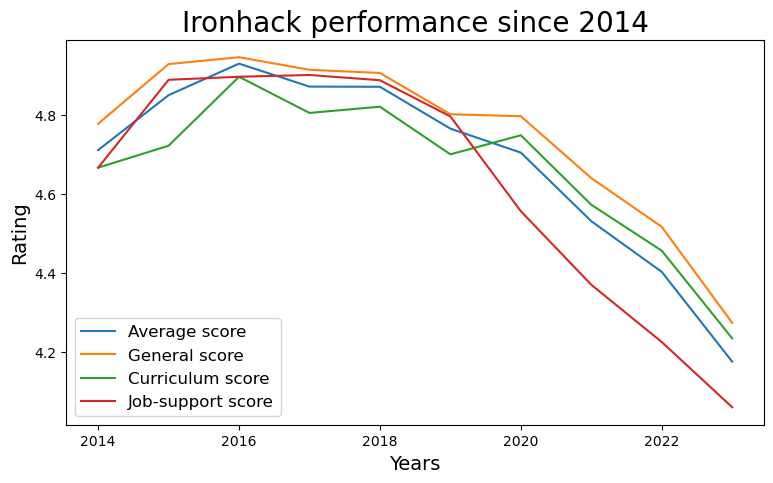

In [33]:
### IRONHACK PERFORMANCE ###

# Copy comments data frame
ironhack_performance = comments_cleaned.copy()

# Select all ironhack entries
iron_perf = iron_perf[iron_perf['school'] == 'ironhack'][['graduatingYear', 'overallScore', 'overall', 'curriculum', 'jobSupport']]

# Change column data types
iron_perf['graduatingYear'] = iron_perf['graduatingYear'].astype('int')
iron_perf['overallScore'] = iron_perf['overallScore'].astype('float')
iron_perf['overall'] = iron_perf['overall'].astype('float')
iron_perf['curriculum'] = iron_perf['curriculum'].astype('float')
iron_perf['jobSupport'] = iron_perf['jobSupport'].astype('float')

# Sum of ratings per year
iron_weight = list(iron_perf.groupby('graduatingYear')['jobSupport'].count())

# Calculate means (grouped by year)
iron_perf = iron_perf.groupby('graduatingYear').mean().reset_index()
iron_perf = iron_perf[iron_perf['graduatingYear'] > 2011]

# Calculate weights
iron_perf['ratings'] = iron_weight[1:]
iron_perf['weight'] = (iron_perf['ratings'] * 100 / iron_perf['ratings'].sum()).round(2)

# Ironhack performance data frame
display(iron_perf)

# Ironhack performance plot
plt.figure(figsize = (9, 5))
plt.plot(iron_perf['graduatingYear'], iron_perf['overallScore'], label = 'Average score')
plt.plot(iron_perf['graduatingYear'], iron_perf['overall'], label = 'General score')
plt.plot(iron_perf['graduatingYear'], iron_perf['curriculum'], label = 'Curriculum score')
plt.plot(iron_perf['graduatingYear'], iron_perf['jobSupport'], label = 'Job-support score')
plt.title('Ironhack performance since 2014', fontsize = 20)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)
plt.legend(loc = 'lower left', fontsize = 12)
# plt.ylim(ymin = 3.75, ymax = 5.25)
plt.show()